<a href="https://colab.research.google.com/github/SudeepSarkar/sarkar-computer-vision-lectures/blob/main/CV_Module_5_4_AlexNet_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced CNN Architectures

* The material for this notebook is taken from the Open Source book -- Dive into Deep Learning. I have adapted a few things for the Computer Vision course at the University of South Florida, Tampa. https://d2l.ai/chapter_convolutional-modern/index.htm

* Some figures are taken from Richard Szeliski's vision textbook.

* Much of the code is take from pytorch

# Topics covered

* You will study in depth AlexNet, the first large-scale network deployed to beat conventional computer vision methods on a large-scale vision challenge, called ImageNet

**Concepts Learned:** dropouts, regularization, library of networks in torchvision



## Code: setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn

# ImageNet

* It is a landmark dataset that accelerated the adoption of deep learning.

* The most highly-used subset of ImageNet is the [ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012-2017](https://image-net.org/challenges/LSVRC/index.php) image classification and localization dataset. 

* This dataset spans 1000 object classes and contains 1,281,167 training images, 50,000 validation images and 100,000 test images. This subset is available on [Kaggle](https://www.kaggle.com/c/imagenet-object-localization-challenge/overview/description).

* ImageNet is available (March 11, 2021 updated): https://www.image-net.org/update-mar-11-2021.php

* **Do NOT try to download ImageNet it is 150GB!**


# AlexNet

* AlexNet won the [ImageNet Large Scale Visual Recognition Challenge 2012](https://link.springer.com/article/10.1007/s11263-015-0816-y?sa_campaign=email/event/articleAuthor/onlineFirst) by a considerable margin. For the first time, this network showed that the features obtained by learning could transcend manually designed features, breaking the previous paradigm in computer vision.

* The paper is here https://dl.acm.org/doi/pdf/10.1145/3065386

* The architectures of AlexNet and LeNet are very similar.

* AlexNet consists of eight layers: 
    1. five convolutional layers,
        * Image sizes: 227 by 227
        * convolution kernels are larger: $11 \times 11$, $5\times5$, followed by $3\times3$.

        * In addition, after the first, second, and fifth convolutional layers,
the network adds maximum pooling layers
with a window shape of $3\times3$ and a stride of 2.
    1. two fully-connected hidden layers, 
    1. one fully connected output layer. 
    1. Use ReLU between layers instead of the sigmoid as its activation function.

* Pytorch has the trained model available.

    https://pytorch.org/vision/stable/_modules/torchvision/models/alexnet.html



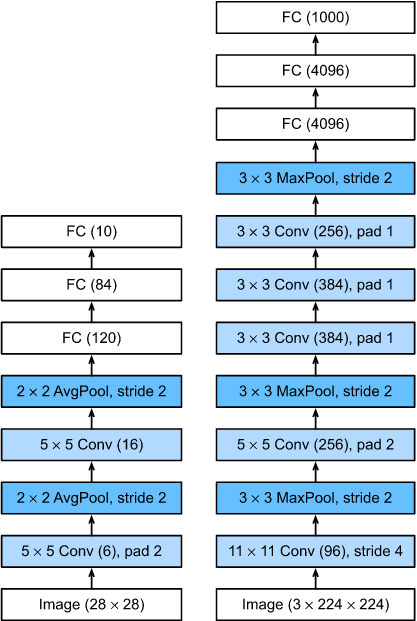

        LeNet                     AlexNet

## Dropout Layer

* During training, randomly zeroes some of the elements of the input tensor with probability $p$ using samples from a Bernoulli distribution. 
* Throughout the training, on each iteration, standard dropout consists of zeroing out some fraction of the nodes in each layer before calculating the subsequent layer.
* We normalize the nodes not zeroed out by the fraction of retained nodes (not dropped out). In other words, with *dropout probability* $p$,
each intermediate activation $h$ is replaced by a random variable $h'$ as follows:

\begin{equation}
h' =
\begin{cases}
    0 & \text{ with probability } p \\
    \frac{h}{1-p} & \text{ otherwise}
\end{cases}
\end{equation}

* By design, the expectation remains unchanged, i.e., $E[h'] = h$.
* This has proven to be an effective technique for regularization and preventing overfitting.

* A common trend is to set a lower dropout probability closer to the input layer. 

* Recall the MLP with a hidden layer and 5 hidden units. This is shown below too. 

* When we apply dropout to a hidden layer, zeroing out each hidden unit with probability $p$, the result can be viewed as a network containing only a subset of the original neurons.

    * $h_2$ and $h_5$ are removed. Consequently, the calculation of the outputs no longer depends on $h_2$ or $h_5$ and their respective gradient also vanishes
when performing backpropagation.
    * In this way, the calculation of the output layer
cannot be overly dependent on any one element of $h_1, \ldots, h_5$.

* Typically, we disable dropout at test time. 
    * Given a trained model and a new example, we do not drop out any nodes
and thus do not need to normalize. 
    * However, there are some exceptions: some researchers use dropout at test time as a heuristic for estimating the *uncertainty* of neural network predictions: if the predictions agree across many different dropout masks,
then we might say that the network is more confident.



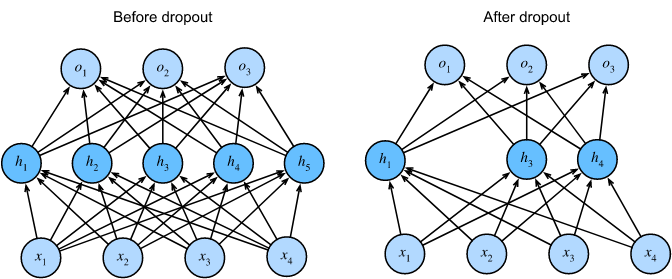

In [ ]:
m = nn.Dropout(p=0.5)
input = torch.randn(1,10)
output = m(input)
print('input=\n', input)
print('output=\n', output)

input=
 tensor([[ 0.1549, -1.7412,  0.7803,  1.5924,  1.4211, -0.1488,  0.2037, -1.9812,
         -1.1545,  0.6157]])
output=
 tensor([[ 0.3098, -0.0000,  0.0000,  3.1848,  2.8421, -0.0000,  0.0000, -0.0000,
         -2.3089,  0.0000]])


## Code: AlexNet

In [ ]:
AlexNet = torchvision.models.alexnet(weights=torchvision.models.AlexNet_Weights.DEFAULT)
AlexNet.eval()

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Code: # of AlexNet parameters

In [ ]:
#-----------List total number of parameter in the model
total_params = sum(p.numel() for p in AlexNet.parameters() if p.requires_grad)
print('Total parameters:', total_params)


Total parameters: 61100840


## Code: Display AlexNet weights

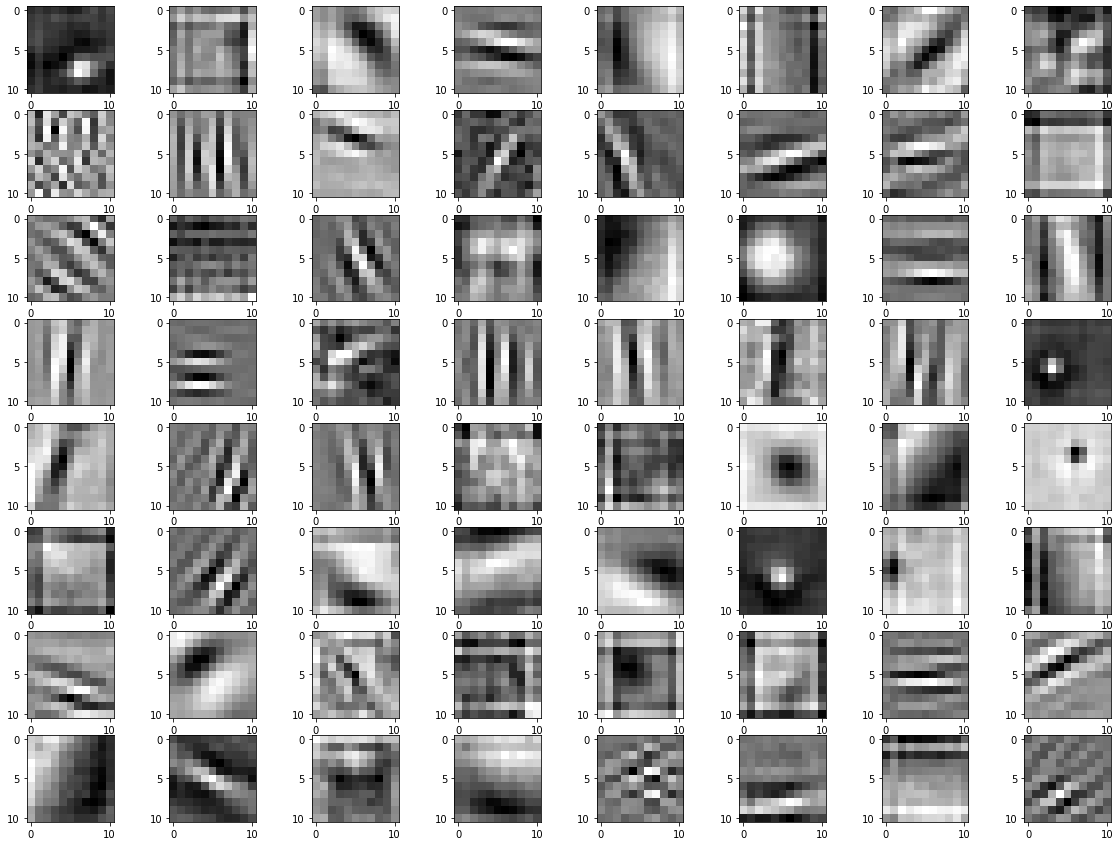

In [ ]:
fig, ax = plt.subplots(nrows=8, ncols=8)
fig.set_size_inches (20, 15)

for i in range (64) :
    ax[np.unravel_index(i, (8, 8))].imshow (AlexNet.features[0].weight.data[i, 2, :], 'gray')
    # Display weights for only ONE of the color channel
    # Trying changing it to see the weights for other channels. Are they different?
 

## Code: Display activations of the convolution layers

All pre-trained models expect input images normalized in the same way,
i.e. mini-batches of 3-channel RGB images of shape `(3 x H x W)`, where `H` and `W` are expected to be at least `224`.
The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]`
and `std = [0.229, 0.224, 0.225]`.

Here's a sample execution.

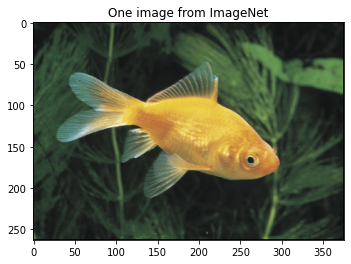

In [ ]:
from skimage import io
from PIL import Image
import random


# ------------Read an image-----------------------------------
input_image = io.imread('https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n01443537_goldfish.JPEG')
input_image = Image.fromarray(input_image)
plt.imshow(input_image)
plt.title('One image from ImageNet');

Conv2d output shape:	 torch.Size([1, 64, 55, 55])
ReLU output shape:	 torch.Size([1, 64, 55, 55])
MaxPool2d output shape:	 torch.Size([1, 64, 27, 27])
Conv2d output shape:	 torch.Size([1, 192, 27, 27])
ReLU output shape:	 torch.Size([1, 192, 27, 27])
MaxPool2d output shape:	 torch.Size([1, 192, 13, 13])
Conv2d output shape:	 torch.Size([1, 384, 13, 13])
ReLU output shape:	 torch.Size([1, 384, 13, 13])
Conv2d output shape:	 torch.Size([1, 256, 13, 13])
ReLU output shape:	 torch.Size([1, 256, 13, 13])
Conv2d output shape:	 torch.Size([1, 256, 13, 13])
ReLU output shape:	 torch.Size([1, 256, 13, 13])
MaxPool2d output shape:	 torch.Size([1, 256, 6, 6])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 256, 6, 6])
Dropout output shape:	 torch.Size([9216])
Linear output shape:	 torch.Size([4096])
ReLU output shape:	 torch.Size([4096])
Dropout output shape:	 torch.Size([4096])
Linear output shape:	 torch.Size([4096])
ReLU output shape:	 torch.Size([4096])
Linear output shape:	 torch.Size([1000]

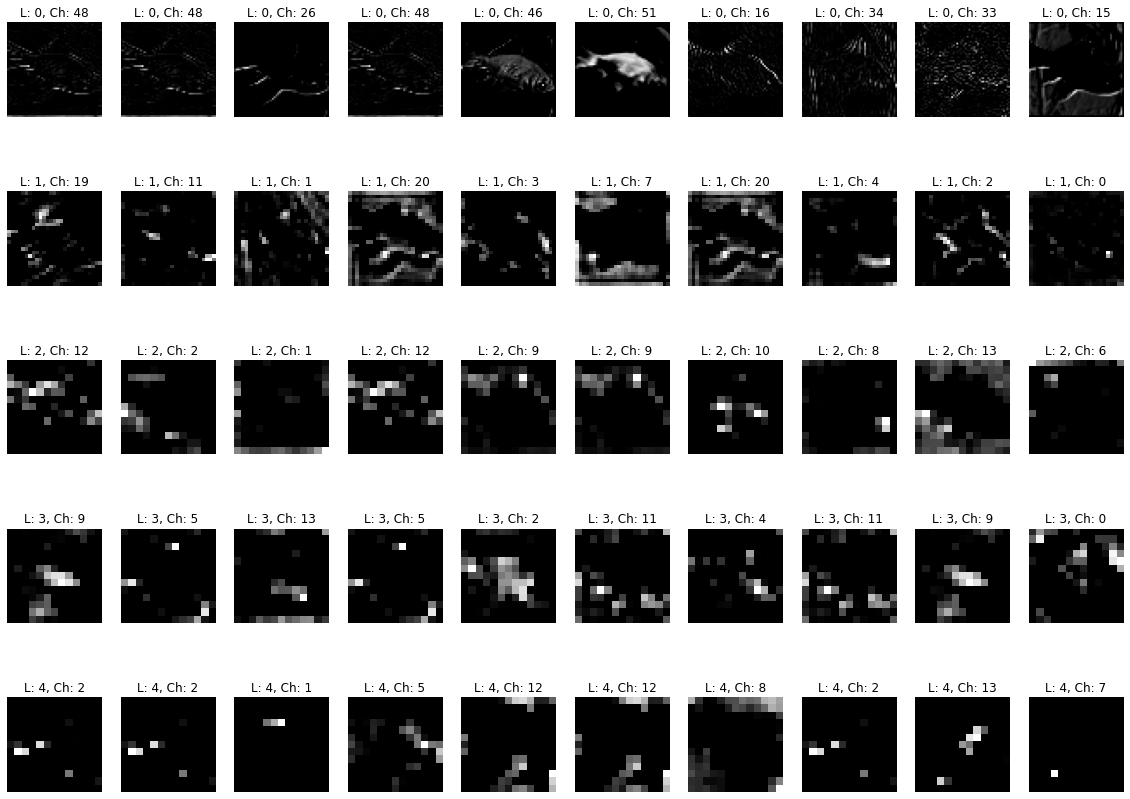

In [ ]:
# -----------Normalize the image----------------------------
from torchvision import transforms
# The following creates an instance of transform sequence
preprocess = transforms.Compose([
    transforms.Resize(256), # resize to 256 by 256
    transforms.CenterCrop(224), # Crop a 224 by 224 sized image from the center
    transforms.ToTensor(),   # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # normalize pixel colod to have the ImageNet  mean and std
])
# Run the transform sequence on the image
input_tensor = preprocess(input_image)

# turn the 3D image array to a 4D one with 1 for mini-batch size, as expected by the model
input_batch = input_tensor.unsqueeze(0) 

#--------------Create figure subplots---------------------------
fig, ax = plt.subplots(nrows=5, ncols=10)
fig.set_size_inches (20, 15)

#-------------Run the input through the layers-----------------
X = input_batch #torch.zeros (1, 3, 227, 227) # Sample image
k = 0
for layer in AlexNet.features :
    X = layer(X) # The output of a layer is the input to the next layer in the following iteration.
    if (layer.__class__.__name__ == 'ReLU'):

        # randomly select 10 channel ids to display
        ch = [random.randint(0, X.shape[2]) for p in range(0, 10)]
        for j in range(10):
            ax[k, j].imshow(X[0, ch[j], :].detach().numpy(), 'gray')
            ax[k, j].set_title('L: %d, Ch: %d'%(k, ch[j]))
            ax[k, j].axis('off')

        k = k+1
    print(layer.__class__.__name__, 'output shape:\t', X.shape)
    

X = AlexNet.avgpool(X)
print(AlexNet.avgpool.__class__.__name__, 'output shape:\t', X.shape)
X = torch.flatten(X)

for layer in AlexNet.classifier :
    X = layer(X) # The output of a layer is the input to the next layer in the following iteration.
    print(layer.__class__.__name__, 'output shape:\t', X.shape)


In [ ]:
model = AlexNet

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
    
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
#print(probabilities)

In [ ]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-11-23 21:24:57--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-11-23 21:24:58 (74.8 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)

for i in range(top5_prob.size(0)):
    print('%s \t with probability: %4.3f'%(categories[top5_catid[i]], top5_prob[i].item()))

goldfish 	 with probability: 1.000
tench 	 with probability: 0.000
rock beauty 	 with probability: 0.000
axolotl 	 with probability: 0.000
anemone fish 	 with probability: 0.000


# Note

* While the idea of deep neural networks is quite simple (stack together a bunch of layers), performance can vary wildly across architectures and hyperparameter choices. 

* The neural network architectures are products of intuition, a few mathematical insights, and **a whole lot of trial and error**. 

# Assignment - CNN visualization

Display the weights of the second convolutional layer in AlexNet corresponding to the 60th input channel of the layer connected to the first 32 of the 192 output channels of the second layer

Comment on the observations that you can make about the shape of these filters.